Idea de usar contornos: Rectangulos

In [625]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib

plt.style.use('dark_background') 

path = '/Users/carlosalvarado/Desktop/ComputerVision/proyecto1/fotos_placas/'
filename = path+'placa6.jpg'
im = cv.imread(filename)

assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)


(330, 600)


In [626]:
def view(img, title=None):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)
    if title:
        plt.title(title)   
    plt.axis('off')
    plt.show()

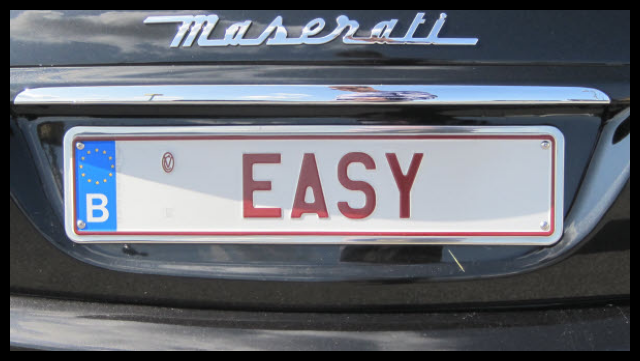

In [627]:
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
cvlib.imgview(img)

In [628]:
im = cv.imread(filename)
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# # floddfill
# im_floodfill = imgray.copy()
# D = 65
# cv.floodFill(im_floodfill, None, (0 ,0), 255,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
b = 5
#blur 
img_blur = cv.blur(imgray,(b,b))
# adaptive Th
imgbin = cv.adaptiveThreshold(img_blur, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,51,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(330, 600)


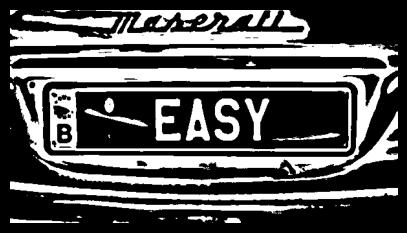

In [629]:
view(imgbin)

In [630]:
contorno = []
for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    # percent =0.052
    # epsilon = percent*cv.arcLength(c,True)
    # approx = cv.approxPolyDP(c,epsilon,True)
    # if (cv.contourArea(approx)>area_media+30): #pongo el mínimo del área
    area = cv.contourArea(c)
    x,y,w,h = cv.boundingRect(c)
    rect_area = w*h
    extent = float(area)/rect_area
    if (extent > 0.6): #pongo el mínimo del área
        if (w > (h*1.35) or w >= (h*1.2)) and ((w > 100 and w < 600) and (h > 50 and h < 330)):
            print(f"el h: {h}")
            print(f"el w: {w}")
            contorno.append(c)

for c in contorno:
    
print(len(contorno))

el h: 119
el w: 490
el h: 100
el w: 467
el h: 92
el w: 425
3


In [631]:
colores = {}
indexes = []
thickness = 1
#(255,0,0),602:(0,255,0)
for cnt in range(len(contorno)):
    #print(f"{w}, {h}")
    colores.update({cnt:(0,255,0)})
    indexes.append(cnt)

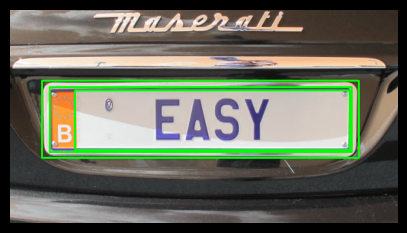

In [632]:
r = im.copy()
# cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
for c in indexes:
    x,y,w,h = cv.boundingRect(contorno[c])
    r = cv.rectangle(r,(x,y),(x+w,y+h),colores[c],2)
view(r)